In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, fbeta_score, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

In [129]:
data = pd.read_csv("data/NEO_v2_refined.csv")
data_res_adasyn = pd.read_csv("data/NEO_v2_refined_res_adasyn.csv")
data_res_smoteenn = pd.read_csv("data/NEO_v2_refined_res_smoteenn.csv")

In [130]:
X = data.drop(columns=["hazardous", "id"])
y = data["hazardous"]

X_res_smoteenn = data_res_smoteenn.drop(columns=["hazardous"])
y_res_smoteenn = data_res_smoteenn["hazardous"]

X_res_adasyn = data_res_adasyn.drop(columns=["hazardous"])
y_res_adasyn = data_res_adasyn["hazardous"]


In [131]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=42)
X_train_res_smoteenn, X_test_res_smoteenn, y_train_res_smoteenn, y_test_res_smoteenn  = train_test_split (X_res_smoteenn , y_res_smoteenn , test_size=0.33, random_state=42)
X_train_res_adasyn, X_test_res_adasyn, y_train_res_adasyn, y_test_res_adasyn = train_test_split (X_res_adasyn, y_res_adasyn, test_size=0.33, random_state=42)

## Decision tree C4.5

### Original dataset

NO Cost-sensitive 

In [132]:
decision_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
f2score_tree = fbeta_score(y_test, y_pred, beta=2)

In [133]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 score:", fbeta_score(y_test, y_pred, beta=2, average="micro"), "micro", fbeta_score(y_test, y_pred, beta=2, average="macro"), "macro", fbeta_score(y_test, y_pred, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.8899786495863358
Precision: 0.4416972936852656
Recall: 0.4482875551034249
F2 score: 0.8899786495863358 micro 0.6927161620532902 macro 0.8901229455988949 weighted
ROC AUC score: 0.6932302466381816
---------------------------------------------------------


In [134]:
cross_validate(decision_tree, X, y, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.33039355, 0.32950544, 0.32175756, 0.33258128, 0.31384826,
        0.32162714, 0.3256731 , 0.38447046, 0.34798551, 0.35333896]),
 'score_time': array([0.00935626, 0.0087142 , 0.00906777, 0.00958133, 0.00830507,
        0.00876689, 0.00890994, 0.01052141, 0.01055479, 0.00854969]),
 'test_f1': array([0.41763811, 0.43930636, 0.41548528, 0.4057508 , 0.46477273,
        0.44310656, 0.47808765, 0.45138889, 0.4561194 , 0.47435124]),
 'test_roc_auc': array([0.69175119, 0.699779  , 0.68080262, 0.67811969, 0.70285923,
        0.68320577, 0.70993124, 0.69290193, 0.69112128, 0.69911151])}

YES Cost-sensitive

In [135]:
decision_tree_cost = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train, y_train) # Cost sensitive learning con "balanced"

y_pred = decision_tree_cost.predict(X_test)
f2score_tree_cost_learning = fbeta_score(y_test, y_pred, beta=2)

In [136]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred), y_pred)
print("F2 score:", fbeta_score(y_test, y_pred, beta=2, average="micro"), "micro", fbeta_score(y_test, y_pred, beta=2, average="macro"), "macro", fbeta_score(y_test, y_pred, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.8914798505471043
Precision: 0.4463655610444601
Recall: 0.42895896914208204 [0. 0. 0. ... 0. 0. 0.]
F2 score: 0.8914798505471043 micro 0.6867384264728364 macro 0.8910894465715027 weighted
ROC AUC score: 0.685452955544512
---------------------------------------------------------


In [137]:
cross_validate(decision_tree_cost, X, y, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.34064341, 0.35263562, 0.39130664, 0.39586759, 0.36135864,
        0.37945867, 0.36062813, 0.35795808, 0.38177347, 0.35134125]),
 'score_time': array([0.0089817 , 0.00895071, 0.00874639, 0.00964832, 0.00940633,
        0.00932002, 0.00840306, 0.00853944, 0.00874972, 0.00815749]),
 'test_f1': array([0.43229167, 0.40552486, 0.4115975 , 0.45407872, 0.43514151,
        0.44430919, 0.48080331, 0.45551601, 0.46489104, 0.4609619 ]),
 'test_roc_auc': array([0.69686265, 0.67349382, 0.67347064, 0.69639361, 0.68169821,
        0.68242357, 0.70568844, 0.69170366, 0.69377708, 0.68748831])}

### SMOTEENN resampling

NO Cost-sensitive 

In [138]:
decision_tree_res_smoteenn = DecisionTreeClassifier(random_state=0).fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = decision_tree_res_smoteenn.predict(X_test_res_smoteenn)
f2score_tree_res_smoteenn = fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2)

In [139]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Precision:", precision_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Recall:", recall_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9276103521658543
Precision: 0.9227846286205907
Recall: 0.925771416241099
F2 score: 0.9276103521658543 micro 0.9275054523699052 macro 0.9276117935370962 weighted
ROC AUC score: 0.9275301832042604
---------------------------------------------------------


In [140]:
cross_validate(decision_tree_res_smoteenn, X_res_smoteenn, y_res_smoteenn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.5895052 , 0.5170927 , 0.55021429, 0.52184796, 0.50900197,
        0.52265263, 0.50384974, 0.51659703, 0.50372243, 0.51892614]),
 'score_time': array([0.00920272, 0.01098537, 0.00909543, 0.00835037, 0.00844693,
        0.00863004, 0.00842714, 0.00887728, 0.00864935, 0.00968981]),
 'test_f1': array([0.70792709, 0.89285714, 0.9385076 , 0.9349016 , 0.94877144,
        0.94073554, 0.94261237, 0.93546132, 0.94999412, 0.95458801]),
 'test_roc_auc': array([0.75870473, 0.89764457, 0.94057505, 0.93725239, 0.95073188,
        0.94302664, 0.94487246, 0.9378051 , 0.95202769, 0.95644775])}

YES Cost-sensitive

In [141]:
decision_tree_res_smoteenn_cost = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = decision_tree_res_smoteenn_cost.predict(X_test_res_smoteenn)
f2score_tree_res_smoteenn_cost_learning = fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2)

In [142]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Precision:", precision_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Recall:", recall_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9287773735154802
Precision: 0.9231539782484258
Recall: 0.928001150830756
F2 score: 0.9287773735154802 micro 0.9287026993835775 macro 0.9287790523610695 weighted
ROC AUC score: 0.9287435338554015
---------------------------------------------------------


In [143]:
cross_validate(decision_tree_res_smoteenn_cost, X_res_smoteenn, y_res_smoteenn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.63305807, 0.59347439, 0.62209415, 0.59372759, 0.56099916,
        0.55778718, 0.54858422, 0.5526228 , 0.52868938, 0.52971959]),
 'score_time': array([0.00931454, 0.01008844, 0.008497  , 0.00855446, 0.00836396,
        0.00832295, 0.00830865, 0.00851727, 0.00819945, 0.00804281]),
 'test_f1': array([0.72375921, 0.89363734, 0.94400368, 0.9385566 , 0.94964029,
        0.94160328, 0.94512904, 0.93350354, 0.94812544, 0.95371669]),
 'test_roc_auc': array([0.76835389, 0.89855265, 0.94597244, 0.94083491, 0.95159068,
        0.94385544, 0.94719954, 0.93581087, 0.95024188, 0.95559877])}

### ADASYN resamble

NO Cost-sensitive


In [144]:
decision_tree_res_adasyn = DecisionTreeClassifier(random_state=0).fit(X_train_res_adasyn, y_train_res_adasyn)

y_pred_res_adasyn = decision_tree_res_adasyn.predict(X_test_res_adasyn)
f2score_tree_res_adasyn = fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2)

In [145]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Precision:", precision_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Recall:", recall_score(y_test_res_adasyn, y_pred_res_adasyn))
print("F2 score:", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_adasyn, y_pred_res_adasyn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9381538796861377
Precision: 0.9375774967229957
Recall: 0.9415468905649637
F2 score: 0.9381538796861378 micro 0.9380956520012188 macro 0.9381515845239962 weighted
ROC AUC score: 0.9380808521401336
---------------------------------------------------------


In [146]:
cross_validate(decision_tree_res_adasyn, X_res_adasyn, y_res_adasyn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([1.37897611, 1.4369247 , 1.34922433, 1.22411799, 1.39154649,
        1.30669546, 1.25446343, 1.34885693, 1.21476173, 1.33678007]),
 'score_time': array([0.01376486, 0.01357508, 0.01266098, 0.01345563, 0.01292753,
        0.0124197 , 0.01240444, 0.01291776, 0.01417279, 0.01340747]),
 'test_f1': array([0.48791976, 0.94757551, 0.95898113, 0.95727085, 0.96296296,
        0.96545718, 0.96357864, 0.96250939, 0.9661135 , 0.96844548]),
 'test_roc_auc': array([0.65362019, 0.94536028, 0.95665962, 0.95494032, 0.96104492,
        0.96406126, 0.96180035, 0.96073544, 0.96471163, 0.96710383])}

YES Cost-sensitive

In [147]:
decision_tree_res_adasyn_cost = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train_res_adasyn, y_train_res_adasyn)

y_pred_res_adasyn = decision_tree_res_adasyn_cost.predict(X_test_res_adasyn)
f2score_tree_res_adasyn = fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2)

In [148]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Precision:", precision_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Recall:", recall_score(y_test_res_adasyn, y_pred_res_adasyn))
print("F2 score:", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_adasyn, y_pred_res_adasyn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9376271432723046
Precision: 0.9371722182849043
Recall: 0.9409065034865519
F2 score: 0.9376271432723045 micro 0.9375705374070908 macro 0.9376250384061346 weighted
ROC AUC score: 0.9375565618219459
---------------------------------------------------------


In [149]:
cross_validate(decision_tree_res_adasyn_cost, X_res_adasyn, y_res_adasyn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([1.47446871, 1.54097795, 1.42315292, 1.29233384, 1.44215226,
        1.39585066, 1.36555362, 1.43699574, 1.327178  , 1.48868513]),
 'score_time': array([0.01417518, 0.01320434, 0.0124824 , 0.01278138, 0.01377821,
        0.01235533, 0.01281548, 0.01266885, 0.01229167, 0.01612663]),
 'test_f1': array([0.48413877, 0.9477707 , 0.95950442, 0.95774486, 0.96210551,
        0.96382609, 0.96451687, 0.96272323, 0.96593349, 0.96816838]),
 'test_roc_auc': array([0.65172408, 0.94561234, 0.95719616, 0.95541383, 0.96014249,
        0.96229703, 0.96284116, 0.96098347, 0.96453482, 0.96679687])}

## Naive Bayes

### Original dataset

In [150]:
bayes = GaussianNB().fit(X_train, y_train)

y_pred = bayes.predict(X_test)
f2score_bayes = fbeta_score(y_test, y_pred, beta=2)

In [151]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 score:", fbeta_score(y_test, y_pred, beta=2))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.897417934347478
Precision: 0.3102409638554217
Recall: 0.034927093930145814
F2 score: 0.0424637203166227
ROC AUC score: 0.5132270427285687
---------------------------------------------------------


In [152]:
cross_validate(bayes, X, y, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.02221775, 0.01389551, 0.01345325, 0.0136323 , 0.01379967,
        0.0132761 , 0.01452947, 0.01507211, 0.01494241, 0.01477003]),
 'score_time': array([0.01298141, 0.00772643, 0.00782204, 0.00771832, 0.00761175,
        0.00770617, 0.00868654, 0.0089407 , 0.0084188 , 0.00841093]),
 'test_f1': array([0.07782101, 0.07017544, 0.0555005 , 0.08171206, 0.07429719,
        0.06288032, 0.06126482, 0.06281662, 0.06543967, 0.04158004]),
 'test_roc_auc': array([0.61003904, 0.64051967, 0.64195563, 0.63676498, 0.68051181,
        0.69952613, 0.67326843, 0.67957562, 0.72916311, 0.73518733])}

### SMOTEENN resampling

In [153]:
bayes_smoteen = GaussianNB().fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = bayes_smoteen.predict(X_test_res_smoteenn)
f2score_bayes_res_smoteenn = fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2)

In [154]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Precision:", precision_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Recall:", recall_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.69472094460081
Precision: 0.7077561177934467
Recall: 0.6136805006113788
F2 score: 0.69472094460081 micro 0.6904620999410102 macro 0.6931980450397981 weighted
ROC AUC score: 0.6911879622090443
---------------------------------------------------------


In [155]:
cross_validate(bayes_smoteen, X_res_smoteenn, y_res_smoteenn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.01707816, 0.01608753, 0.01480746, 0.01322818, 0.01390386,
        0.01363254, 0.01377869, 0.01315665, 0.01356983, 0.01325893]),
 'score_time': array([0.01162863, 0.0097692 , 0.00910401, 0.00778818, 0.00842524,
        0.00903201, 0.00808311, 0.0079329 , 0.00892186, 0.00798893]),
 'test_f1': array([0.64591157, 0.64519302, 0.64943905, 0.63991951, 0.66291272,
        0.65857162, 0.65543215, 0.66564024, 0.67548618, 0.68082283]),
 'test_roc_auc': array([0.74033015, 0.75249088, 0.771061  , 0.7672508 , 0.79651024,
        0.80769541, 0.79029594, 0.80153011, 0.83712424, 0.8357231 ])}

### ADASYN resampling

In [156]:
bayes_adasyn = ComplementNB().fit(X_train_res_adasyn, y_train_res_adasyn)

y_pred_res_adasyn = bayes_adasyn.predict(X_test_res_adasyn)
f2score_bayes_res_adasyn = fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2)

In [157]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Precision:", precision_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Recall:", recall_score(y_test_res_adasyn, y_pred_res_adasyn))
print("F2 score:", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_adasyn, y_pred_res_adasyn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.5530187445510026
Precision: 0.5630109850531244
Recall: 0.5561406005407713
F2 score: 0.5530187445510026 micro 0.5529338951151352 macro 0.5530301263877263 weighted
ROC AUC score: 0.5529515530535236
---------------------------------------------------------


In [158]:
cross_validate(bayes_adasyn, X_res_adasyn, y_res_adasyn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.03391457, 0.02090311, 0.02069926, 0.02100849, 0.02083993,
        0.02126718, 0.02149153, 0.0214963 , 0.0211668 , 0.02142668]),
 'score_time': array([0.01224399, 0.01079369, 0.01069093, 0.01076794, 0.01094723,
        0.01128745, 0.01126218, 0.01121116, 0.01108098, 0.01197147]),
 'test_f1': array([0.59510104, 0.56685884, 0.57833948, 0.55067691, 0.56713237,
        0.54524294, 0.54440109, 0.56100141, 0.53228897, 0.53927289]),
 'test_roc_auc': array([0.60789079, 0.58611016, 0.5873674 , 0.56125676, 0.5643585 ,
        0.53326101, 0.54072338, 0.55334378, 0.50430803, 0.50998424])}

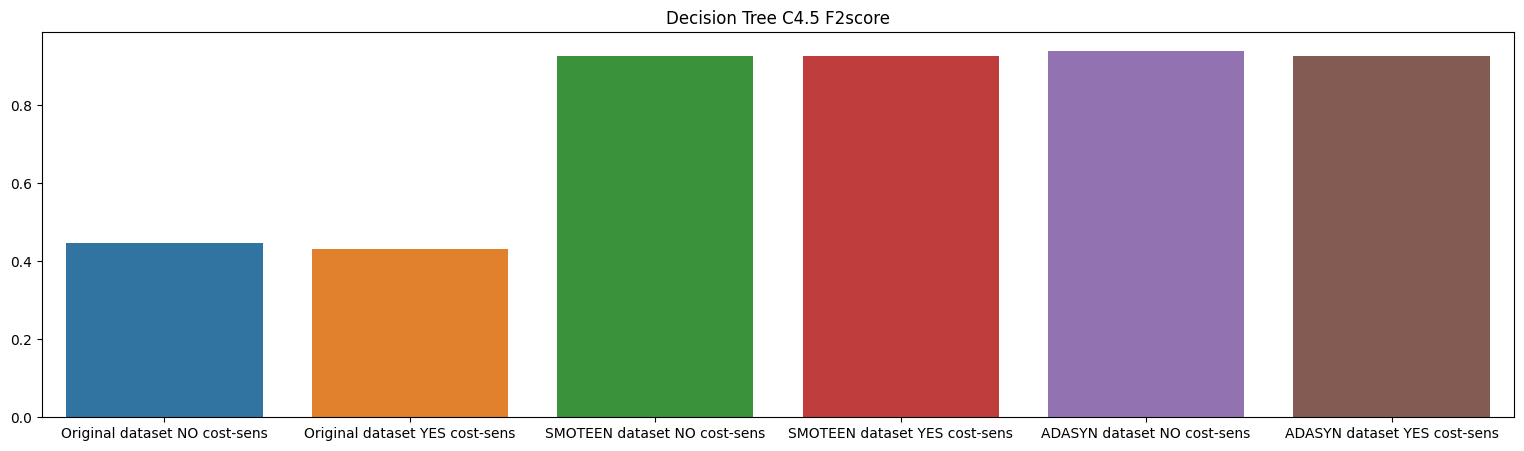

In [159]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(19, 5))
plt.title("Decision Tree C4.5 F2score")
sns.barplot(x=["Original dataset NO cost-sens", "Original dataset YES cost-sens", "SMOTEEN dataset NO cost-sens", "SMOTEEN dataset YES cost-sens", "ADASYN dataset NO cost-sens", "ADASYN dataset YES cost-sens"], y=[f2score_tree, f2score_tree_cost_learning, f2score_tree_res_smoteenn, f2score_tree_res_smoteenn_cost_learning, f2score_tree_res_adasyn,f2score_tree_res_smoteenn_cost_learning])
plt.show()

<AxesSubplot:title={'center':'Decision Tree C4.5 F2score Cost-sensitive'}>

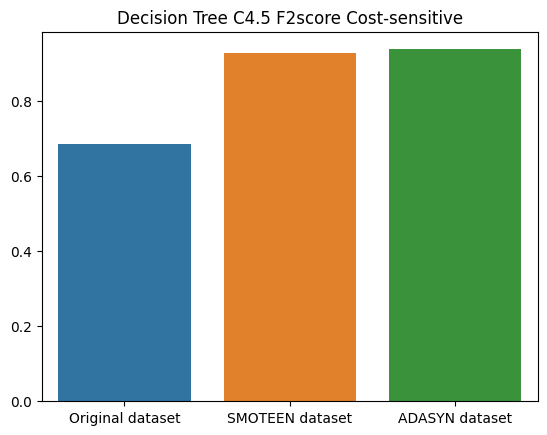

In [7]:
plt.title("Naive Bayes F2score Cost")
sns.barplot(x=["Original dataset", "SMOTEEN dataset","ADASYN dataset"], y=[f2score_bayes, f2score_bayes_res_smoteenn, f2score_bayes_res_adasyn])